In [ ]:

import sweetviz as sv
import pandas as pd
# Load the data
df = pd.read_excel('Bankruptcy.xlsx')

#  Sweetviz report
report = sv.analyze(df)

report.show_html("Bankruptcy_Sweetviz_Report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report Bankruptcy_Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None
       industrial_risk  management_risk  financial_flexibility  credibility  \
count       250.000000       250.000000             250.000000   250.000000   
mean          0.518000         0.614000               0.376000     0.470000   
std           0.411526         0.410705               0.401583     0.415682   
min           0.000000         0.000000               

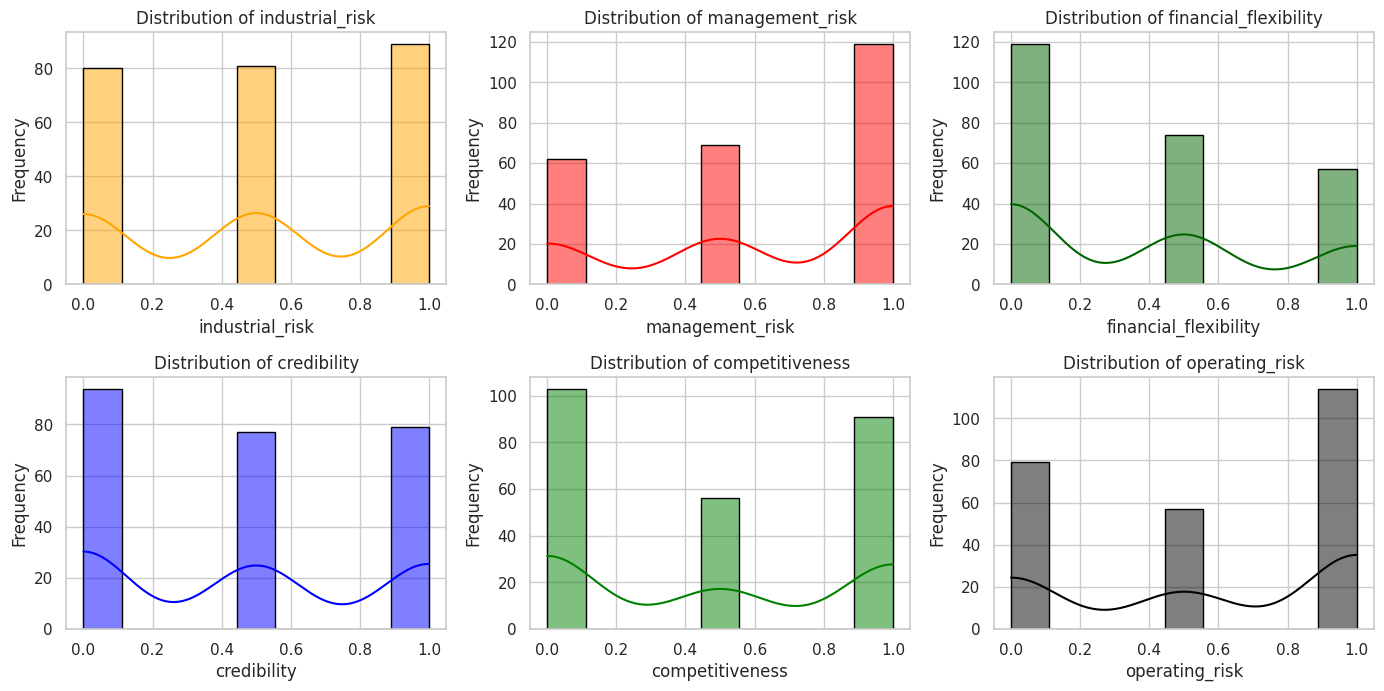

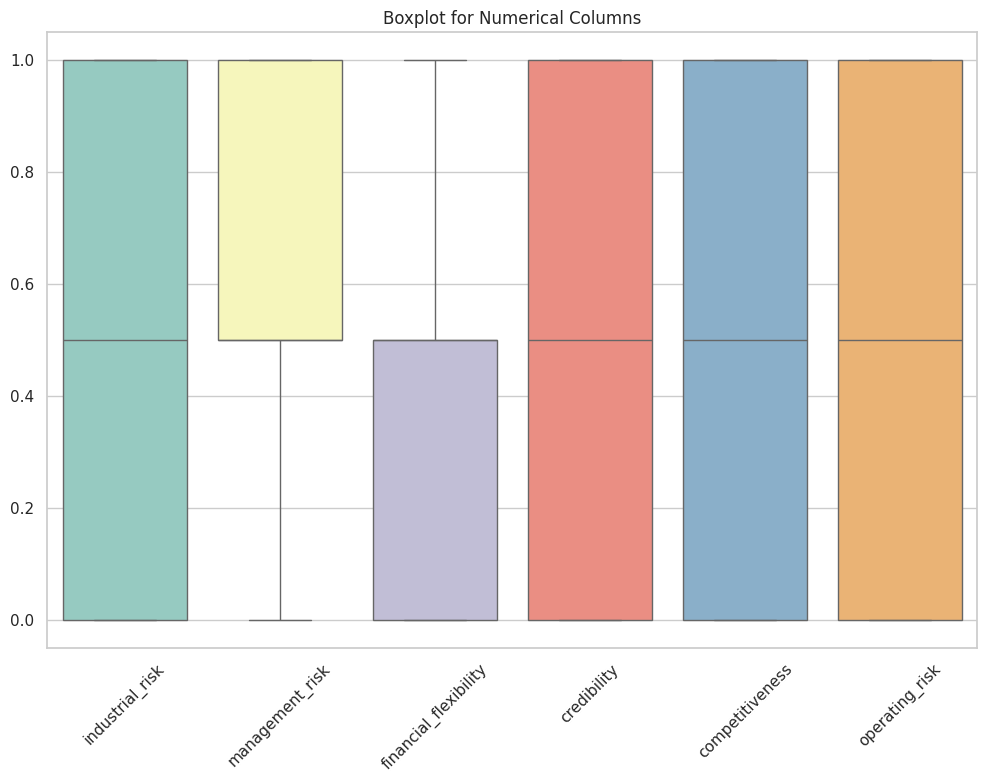

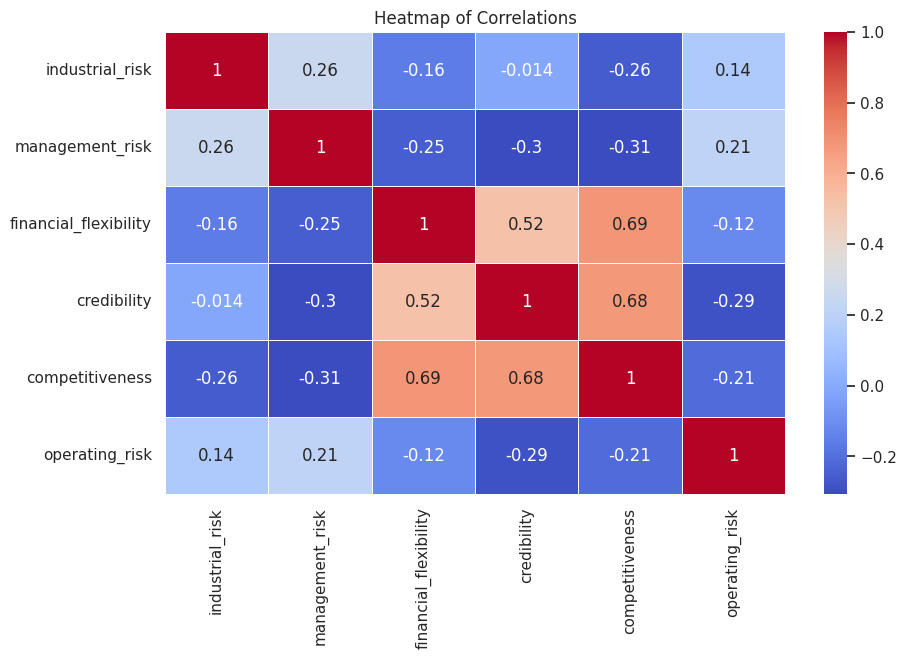

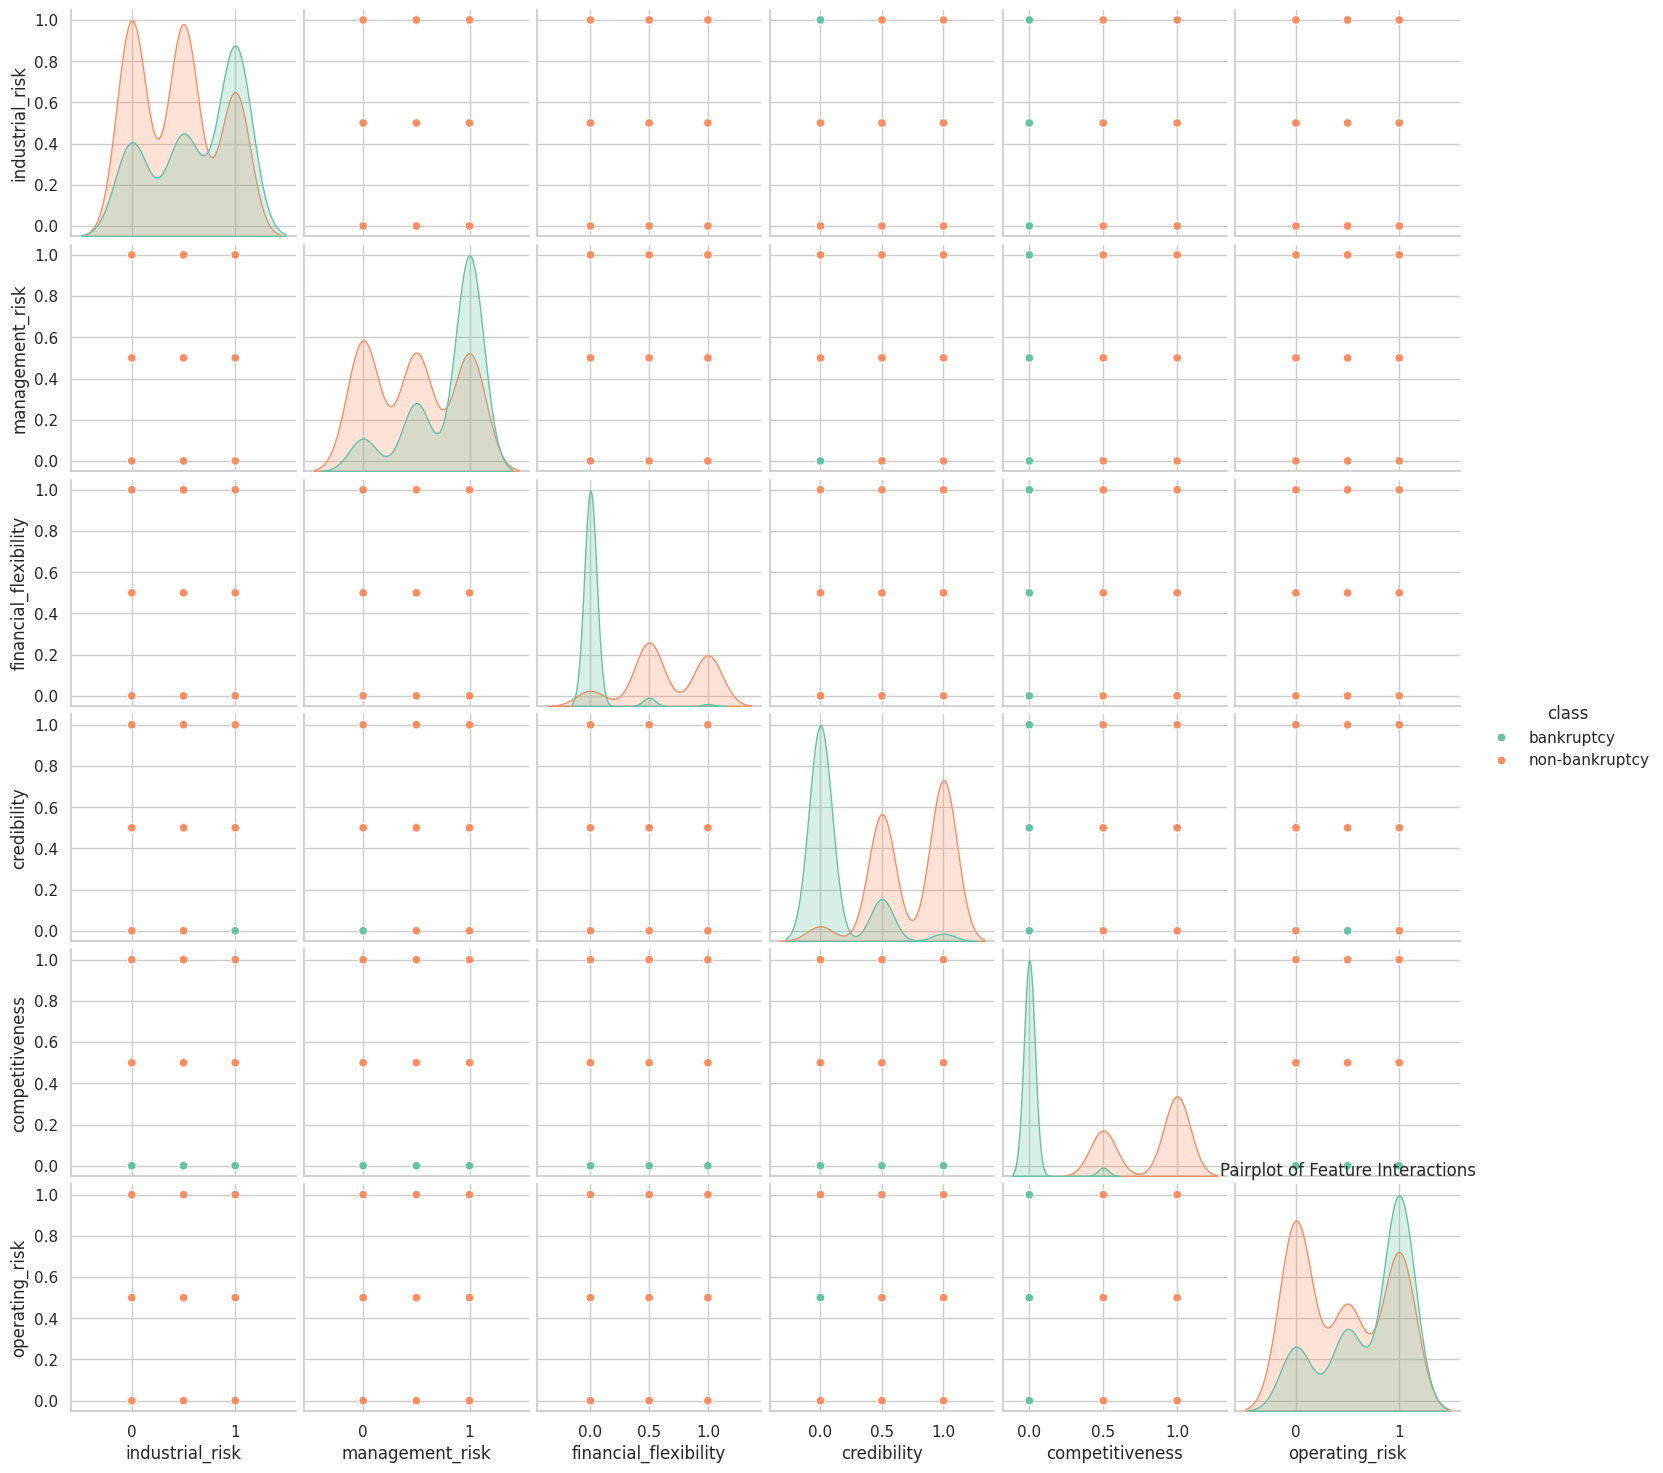

<ipython-input-8-e9b6899d8a72>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set1')


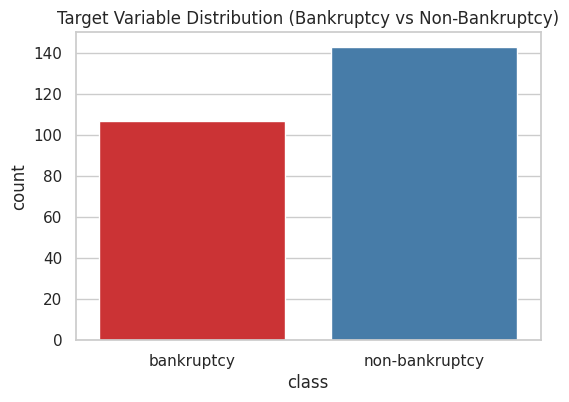

Outliers detected in each numerical column: 
industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
dtype: int64


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("Bankruptcy.xlsx")

# Convert to DataFrame
df = pd.DataFrame(df)

# Set Seaborn style for plots
sns.set(style="whitegrid")

# Summary of the DataFrame
print(df.info())
print(df.describe())

# Define colors for the plots
colors = ['orange', 'red', 'darkgreen', 'blue', 'green', 'black', 'grey', 'violet', 'darkred']

# 1. **Histograms and Density Plots for Numerical Columns**
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(14, 10))

for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, color=colors[i % len(colors)], edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. **Boxplot for Outlier Detection**
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns], palette="Set3")
plt.title('Boxplot for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

# 3. **Heatmap of Correlation between Numerical Features**
# Exclude non-numerical columns (like 'class')
numerical_columns_only = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
corr_matrix = numerical_columns_only.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

# 4. **Pairplot for Feature Interaction Visualization**
sns.pairplot(df, hue='class', palette='Set2')
plt.title('Pairplot of Feature Interactions')
plt.show()

# 5. **Target Variable Distribution**
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set1')
plt.title('Target Variable Distribution (Bankruptcy vs Non-Bankruptcy)')
plt.show()

# 6. **Outlier Detection using IQR**
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using the IQR rule
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers detected in each numerical column: \n{outliers}")


The dataset contains 250 rows with 6 numeric columns and 1 categorical column (class).

All columns have non-null data, indicating no missing values.

Numeric columns represent different risk-related variables:
industrial_risk, management_risk, financial_flexibility, credibility, competitiveness, and operating_risk.

Values in the numeric columns range from 0 to 1, suggesting they are normalized or represent binary outcomes.

Mean values for most variables fall between 0.4 and 0.6, indicating moderate levels of risk across the dataset.

Standard deviations are around 0.4, showing moderate variability, with data spread relatively evenly across the possible range.

industrial_risk: Mean of 0.518, with 50% of values below 0.5, showing a balance between low and high industrial risks.

management_risk: Mean of 0.614, with higher-than-average risk and a wide distribution between 0 and 1.

financial_flexibility: Mean of 0.376, showing generally lower financial flexibility, with 50% of values at or below 0.5.

credibility: Mean of 0.47, indicating a fairly balanced distribution of credibility, ranging from 0 to 1.

competitiveness: Mean of 0.476, with entities falling into a moderate level of competitiveness.

operating_risk: Mean of 0.57, suggesting a higher operational risk across many entities.

Quartile analysis shows that most variables have 25th and 75th percentiles around 0 and 1, indicating that a significant number of entities fall at the extremes of risk levels.



industrial_risk and management_risk have a moderate positive correlation (0.380), indicating that companies with higher industrial risk also tend to have higher management risk.

Negative correlations are observed between financial_flexibility and risk features like industrial_risk (-0.230) and management_risk (-0.181), suggesting that companies with more financial flexibility have lower industrial and management risks.

credibility and financial_flexibility show a positive correlation (0.395), which suggests that companies with better financial flexibility also tend to have higher credibility.

Conclusion

The dataset is clean and contains a balanced distribution of the target variable. The risk features show a uniform spread across different risk levels (low, medium, high), and correlations between variables are moderate, indicating that the features provide independent information. A few potential outliers were detected, but they are reasonable and do not require immediate handling.

The data is well-suited for further classification modeling to predict bankruptcy, with

1) Logistic Regression

2) Decision Trees

3) Random Forest

4) Ensemble methods like XGBoost or LightGBM methods.